In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_style('darkgrid')

from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
import scipy.stats as stats
from sklearn.model_selection import train_test_split

In [4]:
df = pd.read_csv('data/kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [5]:
df.drop(['id'], axis=1, inplace=True)
df.dropna(axis=0)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
3,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
5,5/12/2014,1230000.0,4,4.50,5420,101930,1.0,0.0,0.0,3,11,3890,1530.0,2001,0.0,98053,47.6561,-122.005,4760,101930
6,6/27/2014,257500.0,3,2.25,1715,6819,2.0,0.0,0.0,3,7,1715,?,1995,0.0,98003,47.3097,-122.327,2238,6819
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21591,2/19/2015,475000.0,3,2.50,1310,1294,2.0,0.0,0.0,3,8,1180,130.0,2008,0.0,98116,47.5773,-122.409,1330,1265
21592,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,3,8,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,3,8,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,3,7,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007


In [17]:
housing_df = df[['bedrooms', 'bathrooms', 'yr_built', 'yr_renovated', 'grade', 'condition', 'price', 'sqft_living', 'sqft_lot', 'waterfront']]
housing_df.set_index('price')

,bedrooms,bathrooms,yr_built,yr_renovated,grade,condition,sqft_living,sqft_lot,waterfront
price,,,,,,,,,
221900.0,3,1.00,1955,0.0,7,3,1180,5650,NaN
538000.0,3,2.25,1951,1991.0,7,3,2570,7242,0.0
180000.0,2,1.00,1933,NaN,6,3,770,10000,0.0
604000.0,4,3.00,1965,0.0,7,5,1960,5000,0.0
510000.0,3,2.00,1987,0.0,8,3,1680,8080,0.0
...,...,...,...,...,...,...,...,...,...
360000.0,3,2.50,2009,0.0,8,3,1530,1131,0.0
400000.0,4,2.50,2014,0.0,8,3,2310,5813,0.0
402101.0,2,0.75,2009,0.0,7,3,1020,1350,0.0


In [18]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   bedrooms      21597 non-null  int64  
 1   bathrooms     21597 non-null  float64
 2   yr_built      21597 non-null  int64  
 3   yr_renovated  17755 non-null  float64
 4   grade         21597 non-null  int64  
 5   condition     21597 non-null  int64  
 6   price         21597 non-null  float64
 7   sqft_living   21597 non-null  int64  
 8   sqft_lot      21597 non-null  int64  
 9   waterfront    19221 non-null  float64
dtypes: float64(4), int64(6)
memory usage: 1.6 MB


In [19]:
cor = housing_df.corr()
cor

,bedrooms,bathrooms,yr_built,yr_renovated,grade,condition,price,sqft_living,sqft_lot,waterfront
bedrooms,1.000000,0.514508,0.155670,0.018495,0.356563,0.026496,0.308787,0.578212,0.032471,-0.002386
bathrooms,0.514508,1.000000,0.507173,0.051050,0.665838,-0.126479,0.525906,0.755758,0.088373,0.067282
yr_built,0.155670,0.507173,1.000000,-0.225209,0.447865,-0.361592,0.053953,0.318152,0.052946,-0.026079
yr_renovated,0.018495,0.051050,-0.225209,1.000000,0.016669,-0.061858,0.129599,0.055660,0.004513,0.087244
grade,0.356563,0.665838,0.447865,0.016669,1.000000,-0.146896,0.667951,0.762779,0.114731,0.087383
condition,0.026496,-0.126479,-0.361592,-0.061858,-0.146896,1.000000,0.036056,-0.059445,-0.008830,0.017642
price,0.308787,0.525906,0.053953,0.129599,0.667951,0.036056,1.000000,0.701917,0.089876,0.276295
sqft_living,0.578212,0.755758,0.318152,0.055660,0.762779,-0.059445,0.701917,1.000000,0.173453,0.110230
sqft_lot,0.032471,0.088373,0.052946,0.004513,0.114731,-0.008830,0.089876,0.173453,1.000000,0.023143
waterfront,-0.002386,0.067282,-0.026079,0.087244,0.087383,0.017642,0.276295,0.110230,0.023143,1.000000


<function matplotlib.pyplot.show(close=None, block=None)>

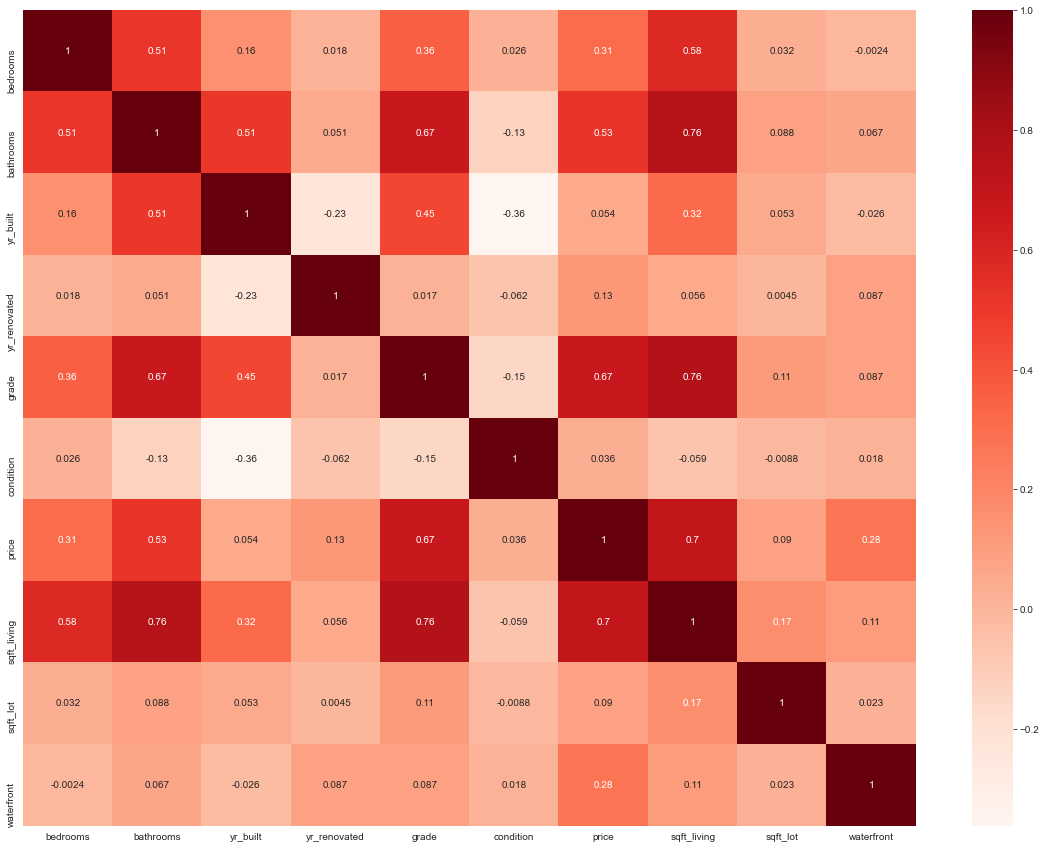

In [20]:
plt.figure(figsize=(20,15))
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show

array([[<AxesSubplot:title={'center':'bedrooms'}>,
        <AxesSubplot:title={'center':'bathrooms'}>,
        <AxesSubplot:title={'center':'yr_built'}>],
       [<AxesSubplot:title={'center':'yr_renovated'}>,
        <AxesSubplot:title={'center':'grade'}>,
        <AxesSubplot:title={'center':'condition'}>],
       [<AxesSubplot:title={'center':'price'}>,
        <AxesSubplot:title={'center':'sqft_living'}>,
        <AxesSubplot:title={'center':'sqft_lot'}>],
       [<AxesSubplot:title={'center':'waterfront'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

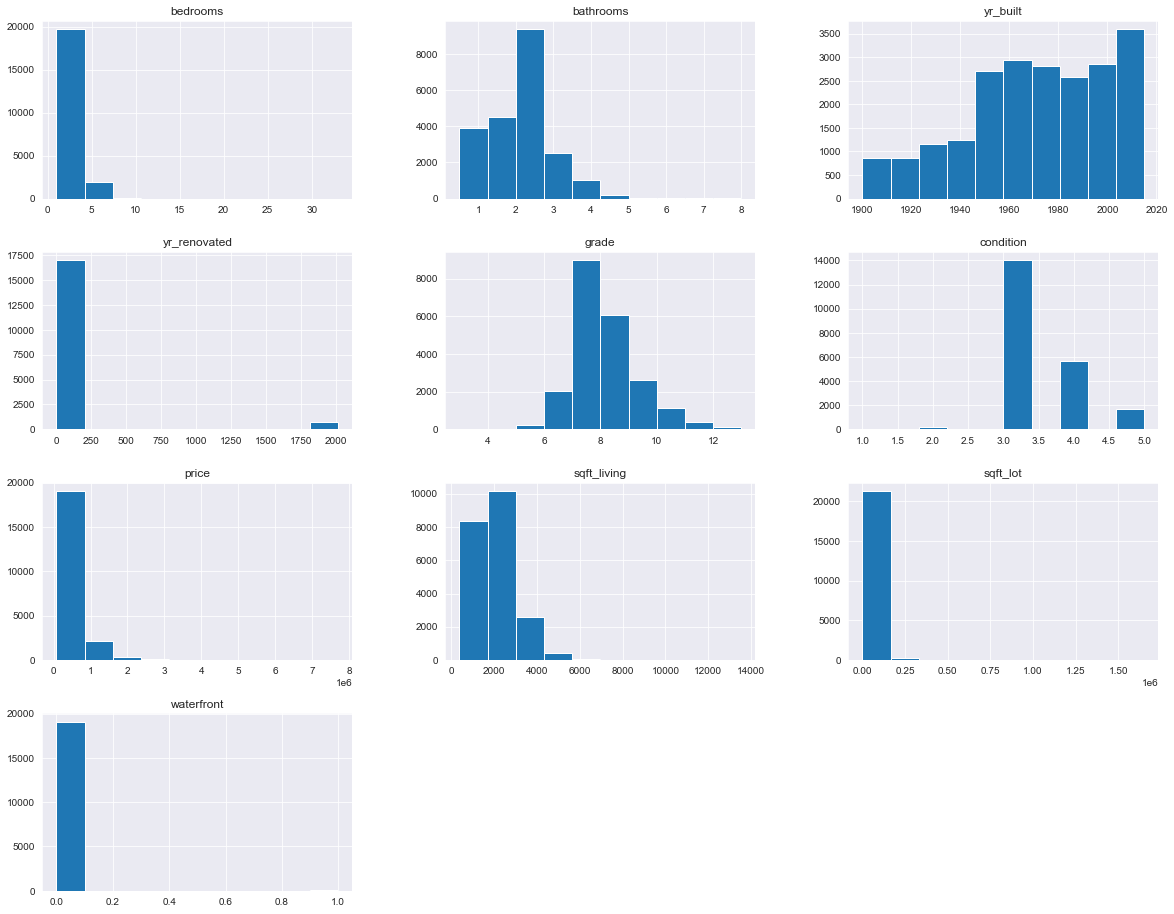

In [21]:
housing_df.hist(figsize=(20,16))


C:\Users\justin.weible\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

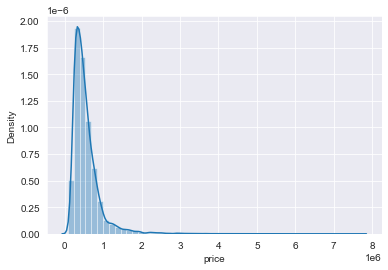

In [22]:
sns.distplot(housing_df['price'])

In [ ]:
Oh, you did